# Burn-through Range

For an escort type jammer, the burn-through range may be expressed as (Equation 11.20)

\begin{equation}\label{eq:burn_escort}
    r_b = \left[ {JSR}_0\, \frac{P_t\, G_t^2 \,\sigma\, r_j^2 \,B_j}{{ERP}\, \, G_r \,4 \,\pi \,B_r \,L_r}\right]^{1/4} \hspace{0.5in} \text{(m)},
\end{equation}

and for a self-screening type jammer (Equation 11.21)

\begin{equation}\label{eq:burn_self}
    r_b = \sqrt{{JSR}_0\, \frac{P_t\, G_t^2 \,\sigma \,B_j}{{ERP}\, \, G_r \,4 \,\pi \,B_r \,L_r}} \hspace{0.5in} \text{(m)}
\end{equation}

Begin by getting the library path

In [1]:
import lib_path

Set the jammer effective radiated power (dBW)

In [2]:
jammer_erp = [20, 40]

Import the `linspace` routine from `scipy` for create the jammer ERP array

In [3]:
from scipy import linspace

jammer_erp_vector = linspace(float(jammer_erp[0]), float(jammer_erp[1]), 1000)

Set the peak power (W), the antenna gain (dB), the target RCS (dBsm), the jammer bandwidth (Hz), the radar bandwidth (Hz), the losses (dB), and the required jammer to signal ratio (dB)

In [4]:
peak_power = 100e3

antenna_gain = 25.0

target_rcs = -5.0

jammer_bandwidth = 20e6

radar_bandwidth = 23.5e6

losses = 4.0

jammer_to_signal_req = 12.0

Set up the keyword args

In [5]:
kwargs = {'peak_power': peak_power,

          'antenna_gain': 10 ** (antenna_gain / 10.0),

          'target_rcs': 10 ** (target_rcs / 10.0),

          'jammer_bandwidth': jammer_bandwidth,

          'effective_radiated_power': 10 ** (jammer_erp_vector / 10),

          'radar_bandwidth': radar_bandwidth,

          'losses': 10 ** (losses / 10.0),

          'jammer_to_signal_req': 10 ** (jammer_to_signal_req / 10.0)}

Import the `burn_through_range_selfscreen` routine from `countermeasures`

In [6]:
from Libs.ecm.countermeasures import burn_through_range_selfscreen

Calculate the burn-through range for the self-screening type jammer (m)

In [7]:
burnthrough_range = burn_through_range_selfscreen(**kwargs)

Import the `matplotlib` routines for plotting the burn-through range for a self-screening type jammer

In [8]:
from matplotlib import pyplot as plt

Display the results

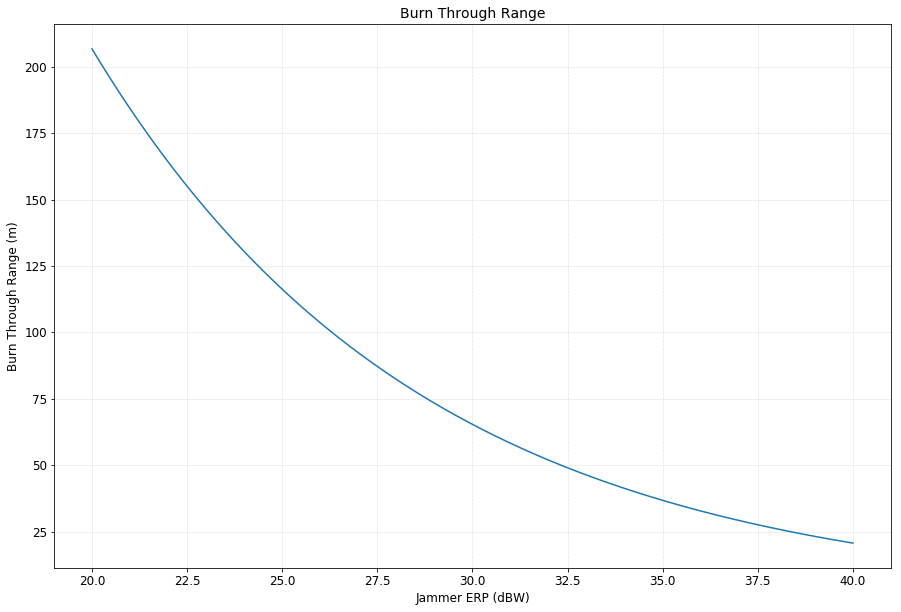

In [9]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Display the results

plt.plot(jammer_erp_vector, burnthrough_range, '')


# Set the plot title and labels

plt.title('Burn Through Range', size=14)

plt.xlabel('Jammer ERP (dBW)', size=12)

plt.ylabel('Burn Through Range (m)', size=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Set the tick label size

plt.tick_params(labelsize=12)

Set the jammer range (m) and antenna gain in the direction of the jammer (dB) for an escort type jammer

In [10]:
jammer_range = 10e3

antenna_gain_jammer_direction = 10.0

Set up the keyword args

In [11]:
kwargs = {'peak_power': peak_power,

          'antenna_gain': 10 ** (antenna_gain / 10.0),

          'target_rcs': 10 ** (target_rcs / 10.0),

          'jammer_range': jammer_range,

          'jammer_bandwidth': jammer_bandwidth,

          'effective_radiated_power': 10 ** (jammer_erp_vector / 10),

          'radar_bandwidth': radar_bandwidth,

          'losses': 10 ** (losses / 10.0),

          'antenna_gain_jammer_direction': 10 ** (antenna_gain_jammer_direction / 10.0),

          'jammer_to_signal_req': 10 ** (jammer_to_signal_req / 10.0)}

Import the `burn_through_range_escort` routine from `countermeasures`

In [12]:
from Libs.ecm.countermeasures import burn_through_range_escort

Calculate the burn-through range for an escort type jammer (m)

In [13]:
burnthrough_range = burn_through_range_escort(**kwargs)

Display the results

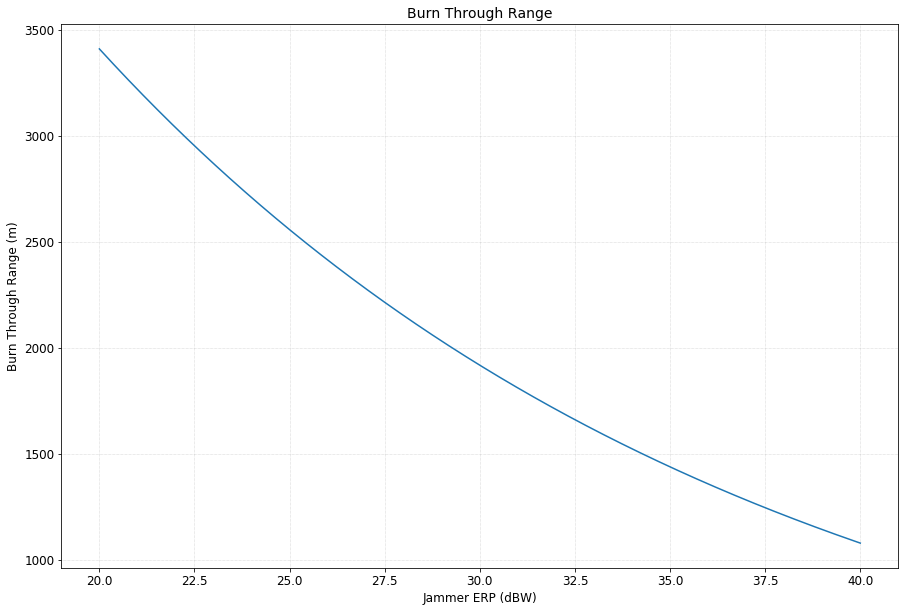

In [14]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)

plt.plot(jammer_erp_vector, burnthrough_range, '')


# Set the plot title and labels

plt.title('Burn Through Range', size=14)

plt.xlabel('Jammer ERP (dBW)', size=12)

plt.ylabel('Burn Through Range (m)', size=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Set the tick label size

plt.tick_params(labelsize=12)